In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Global Power Plant Database

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world.
It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. 
The database covers approximately 35,000 power plants from 167 countries and includes thermal plants 
(e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar).
Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. 
It will be continuously updated as data becomes available.

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw

# Collecting the data from GitHub 

In [2]:
#Reading the dataset
df=pd.read_csv('GPP_csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df.shape

(907, 27)

# Cleaning the data

-Removing unwanted data points
-Bringing structure to data
-Filling in major gaps

In [4]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

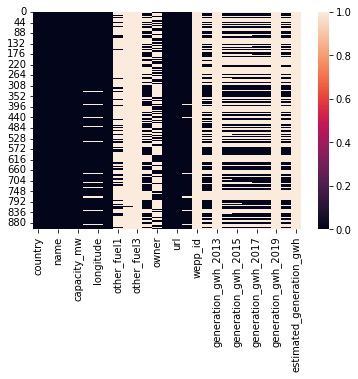

In [29]:
sns.heatmap(df.isnull())

In [7]:
df['latitude'].replace(np.NaN,df['latitude'].mean,inplace=True)
df['longitude'].replace(np.NaN,df['longitude'].mean,inplace=True)
df['generation_gwh_2014'].replace(np.NaN,df['generation_gwh_2014'].mean,inplace=True)
df['generation_gwh_2015'].replace(np.NaN,df['generation_gwh_2015'].mean,inplace=True)
df['generation_gwh_2016'].replace(np.NaN,df['generation_gwh_2016'].mean,inplace=True)
df['generation_gwh_2017'].replace(np.NaN,df['generation_gwh_2017'].mean,inplace=True)
df['generation_gwh_2018'].replace(np.NaN,df['generation_gwh_2018'].mean,inplace=True)

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

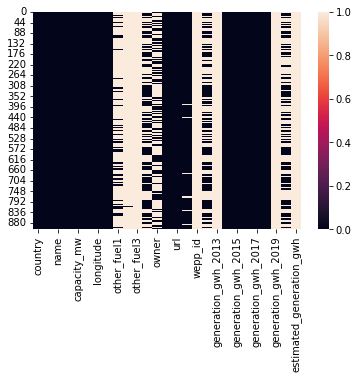

In [9]:
sns.heatmap(df.isnull())

In [16]:
print (df.dtypes)

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object


# Analyzing the data

# Summary Statistics

In [17]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [ ]:
1. The mean is more than median in capacity_mw.
2. There is a large difference in 75% percentile and max in 
   capacity_mw.
3.These observations suggest that there are extreme outliers in these columns.
4. The mean value is higher that 50% it shows there is littel skwness present capacity_mw.

{'whiskers': [<matplotlib.lines.Line2D at 0x14c29667580>,
 'caps': [<matplotlib.lines.Line2D at 0x14c29667b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c296672b0>],
 'medians': [<matplotlib.lines.Line2D at 0x14c29673100>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c296733d0>],
 'means': []}

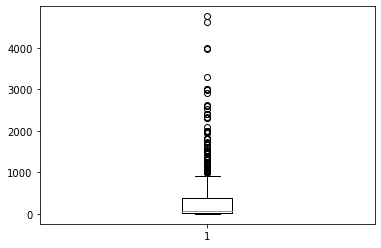

In [27]:
plt.boxplot(df.capacity_mw)

We an see the outliers present in the above boxplot of electrical generating capacity in megawatts

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [23]:
df['capacity_mw'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0       0.000
0.1       5.000
0.2      12.560
0.3      21.968
0.4      33.360
0.5      59.200
0.6     101.000
0.7     246.800
0.8     519.000
0.9    1143.000
1.0    4760.000
Name: capacity_mw, dtype: float64

In [30]:
dfcor=df.corr()
dfcor

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
capacity_mw,1.000000,0.051309,0.197129,NaN,0.304087,NaN,NaN,NaN,0.839094,0.844352,0.870620,0.886673,0.901918,NaN,NaN
latitude,0.051309,1.000000,0.036362,NaN,0.129902,NaN,NaN,NaN,0.060330,0.048610,0.041387,0.040568,0.040476,NaN,NaN
longitude,0.197129,0.036362,1.000000,NaN,0.121910,NaN,NaN,NaN,0.013511,0.022760,0.050732,0.048678,0.045599,NaN,NaN
other_fuel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,0.304087,0.129902,0.121910,NaN,1.000000,NaN,NaN,NaN,0.160014,0.170363,0.193743,0.191367,0.193694,NaN,NaN
wepp_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.839094,0.060330,0.013511,NaN,0.160014,NaN,NaN,NaN,1.000000,0.961098,0.937060,0.912561,0.902781,NaN,NaN
generation_gwh_2015,0.844352,0.048610,0.022760,NaN,0.170363,NaN,NaN,NaN,0.961098,1.000000,0.974918,0.940191,0.934371,NaN,NaN


<AxesSubplot:>

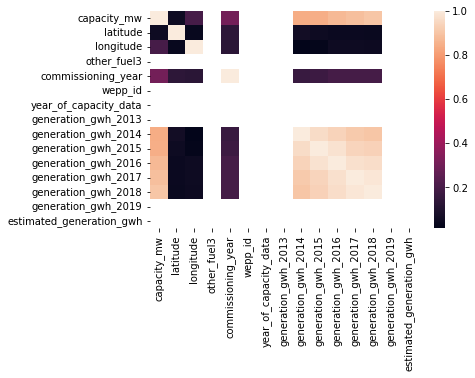

In [31]:
#corellation heat map
sns.heatmap(dfcor)

-Light shaded are highly correlated
-Dark shaded are less correlated

<AxesSubplot:>

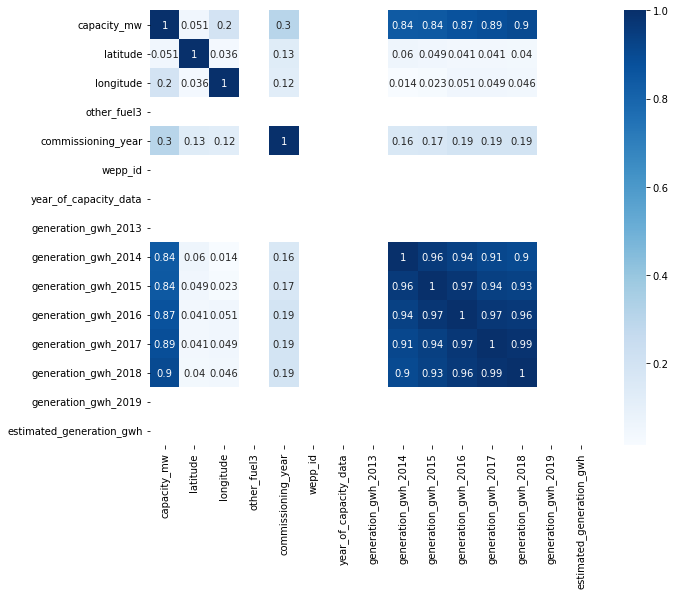

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='Blues',annot=True)

OBSERVATION-
We can see the above countplot the energy source,Coal and Hydro which is mostly used  
in primary electricity generation or export

Text(0.5, 1.0, 'electrical generating capacity in megawatts')

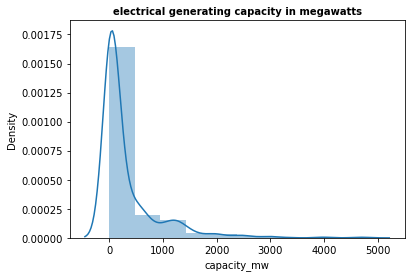

In [41]:
sns.distplot(df['capacity_mw'],bins=10)
plt.title('electrical generating capacity in megawatts',fontsize=10,fontweight="bold")

OBSERVATION-
We can see the lump of the data at start and the long tail follows 
lump of data this is positive skew(Right-Skewed distribution)

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0             0.479445             0.342815             0.858570   
1             0.228118             0.448029             0.740909   
2             0.118423             0.971075             0.680035   
3             0.013989             0.655965             0.174985   
4             0.458623             0.726036             0.541729   
5             0.546454             0.617520             0.254934   
6             0.152393             0.915707             0.961778   
7             0.360917             0.027407             0.542494   
8             0.234343             0.758982             0.435391   
9             0.629493             0.511400             0.241341   

   generation_gwh_2017  generation_gwh_2018  
0             0.814089             0.072328  
1             0.194697             0.636023  
2             0.741643             0.580525  
3             0.361753             0.731729  
4             0.56085

<AxesSubplot:>

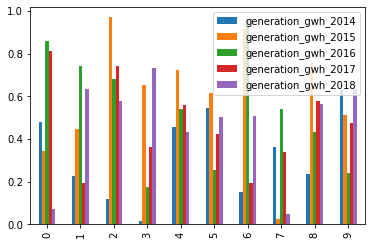

In [12]:
df=pd.DataFrame(np.random.rand(10,5),columns=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'])
print(df)
df.plot.bar()

We can observe from above graph that the electricity generation in gigawatt-hours 
reported for year 2014 tp 2018

   other_fuel1  other_fuel2  other_fuel3
0     0.932444     0.592128     0.991588
1     0.235452     0.920019     0.993292
2     0.066979     0.591336     0.731074
3     0.284253     0.185722     0.501091
4     0.060929     0.386191     0.235213
5     0.631722     0.409016     0.356208
6     0.420194     0.352137     0.596803
7     0.385510     0.205758     0.559928
8     0.399940     0.182557     0.905309
9     0.907252     0.279323     0.894487


Text(0.5, 1.0, 'energy source used in electricity generation or export')

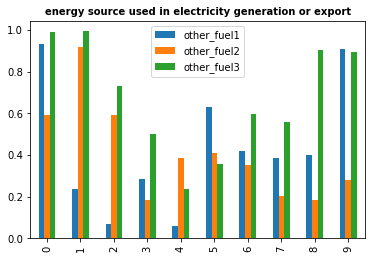

In [54]:
df=pd.DataFrame(np.random.rand(10,3),columns=['other_fuel1','other_fuel2','other_fuel3'])
print(df)
df.plot.bar()
plt.title('energy source used in electricity generation or export',fontsize=10,fontweight="bold")

   other_fuel1
0     0.805090
1     0.776615
2     0.744610
3     0.337760
4     0.149425
5     0.439968
6     0.457102
7     0.270941
8     0.212369
9     0.570685


Text(0.5, 1.0, 'energy source used in electricity generation or export')

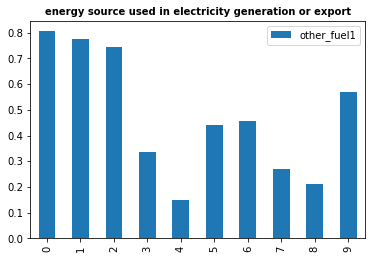

In [4]:
df=pd.DataFrame(np.random.rand(10,1),columns=['other_fuel1'])
print(df)
df.plot.bar()
plt.title('energy source used in electricity generation or export',fontsize=10,fontweight="bold")

We can see that the energy source used in electricity generation or export from above graph

Text(0.5, 1.0, 'electricity generation in gigawatt-hours reported for the year 2014')

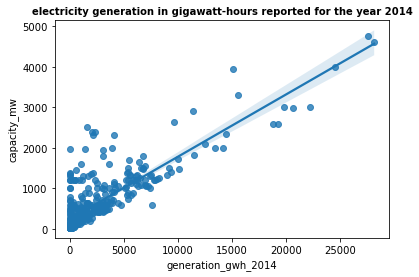

In [6]:
sns.regplot(x="generation_gwh_2014",y="capacity_mw",data=df)
plt.title('electricity generation in gigawatt-hours reported for the year 2014',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'electricity generation in gigawatt-hours reported for the year 2015')

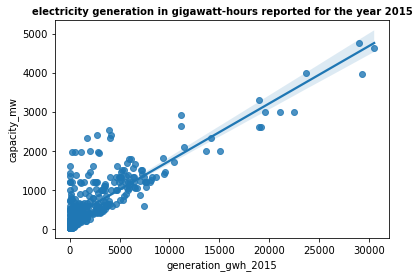

In [7]:
sns.regplot(x="generation_gwh_2015",y="capacity_mw",data=df)
plt.title('electricity generation in gigawatt-hours reported for the year 2015',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'electricity generation in gigawatt-hours reported for the year 2016')

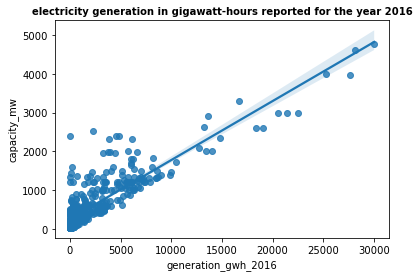

In [8]:
sns.regplot(x="generation_gwh_2016",y="capacity_mw",data=df)
plt.title('electricity generation in gigawatt-hours reported for the year 2016',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'electricity generation in gigawatt-hours reported for the year 2017')

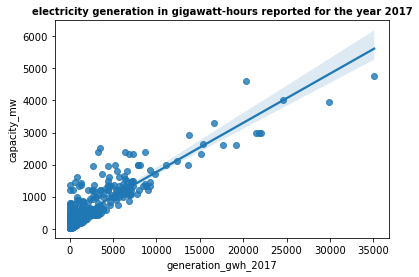

In [9]:
sns.regplot(x="generation_gwh_2017",y="capacity_mw",data=df)
plt.title('electricity generation in gigawatt-hours reported for the year 2017',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'electricity generation in gigawatt-hours reported for the year 2018')

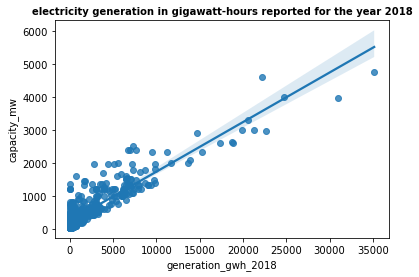

In [10]:
sns.regplot(x="generation_gwh_2018",y="capacity_mw",data=df)
plt.title('electricity generation in gigawatt-hours reported for the year 2018',fontsize=10,fontweight="bold")

# Visualizing data and sharing findings

Text(0.5, 1.0, 'primary electricity generation or export')

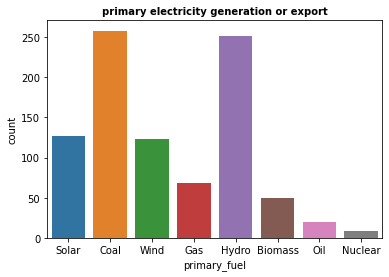

In [3]:
sns.countplot(x='primary_fuel',data=df)
plt.title('primary electricity generation or export',fontsize=10,fontweight="bold")

Observations:-

We can observe that the from the above count plot of primary_fuel
(energy source used in primary electricity generation or export),
most of the energy source used in primary electricity generation is coal energy,
hydro fule energy and solar energy.

We can Predict based on these observations that there is a shortage of coal energy, 
because of excessive use.

Text(0.5, 1.0, 'electrical generating capacity in megawatts')

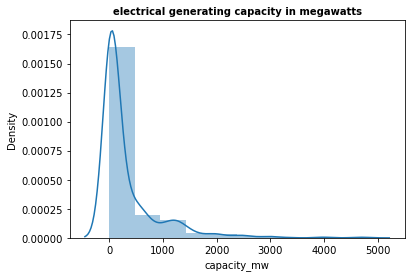

In [5]:
sns.distplot(df['capacity_mw'],bins=10)
plt.title('electrical generating capacity in megawatts',fontsize=10,fontweight="bold")

observations:-
    We can observe electrical generating capacity in megawatts.